In [83]:
import pandas as pd
import plotly
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

In [84]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.drop(['RowNumber'], axis=1, inplace=True)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Задание 9.1

Text(0.5, 1.0, 'Соотношение ушедших и лояльных клиентов')

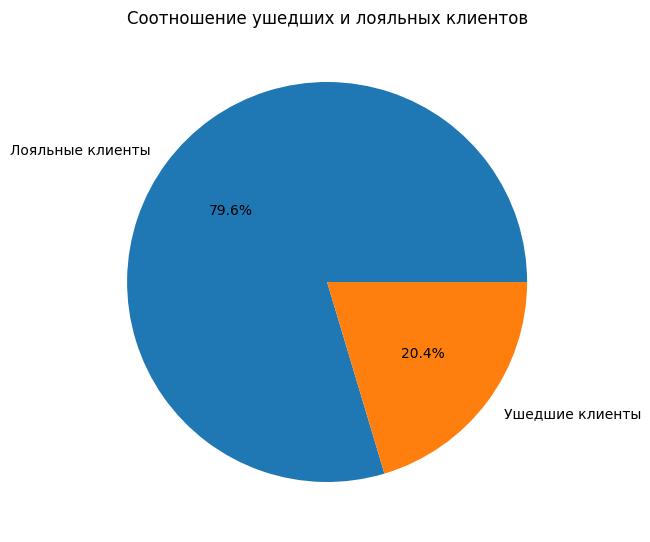

In [85]:
exited_loyal = churn_data.groupby(by='Exited')['Exited'].count()

fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])
axes.pie(
    exited_loyal,
    labels= ["Лояльные клиенты", "Ушедшие клиенты"],
    autopct='%.1f%%',
    explode= [0,0]  
)
axes.set_title('Соотношение ушедших и лояльных клиентов')

#### Число ушедших клиентов сотавляет 20,4% от общего числа и в 4 раза меньше числа лояльных клиентов.

# Задание 9.2

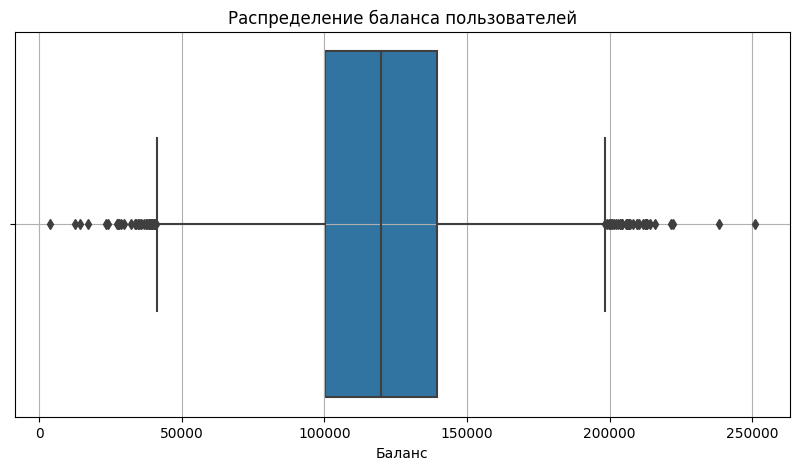

In [86]:
balans1 = churn_data[churn_data["Balance"] > 2500 ]

fig=plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(data = balans1,
                      x="Balance",
                      orient='h',
                      width=0.9)
boxplot.set_title("Распределение баланса пользователей")
boxplot.set_xlabel("Баланс")
boxplot.grid()

#### Длина ящика баланса с усами от 40000 до 195000 долларов, причем медианный баланс составляет 120000 долларов

# Задание 9.3

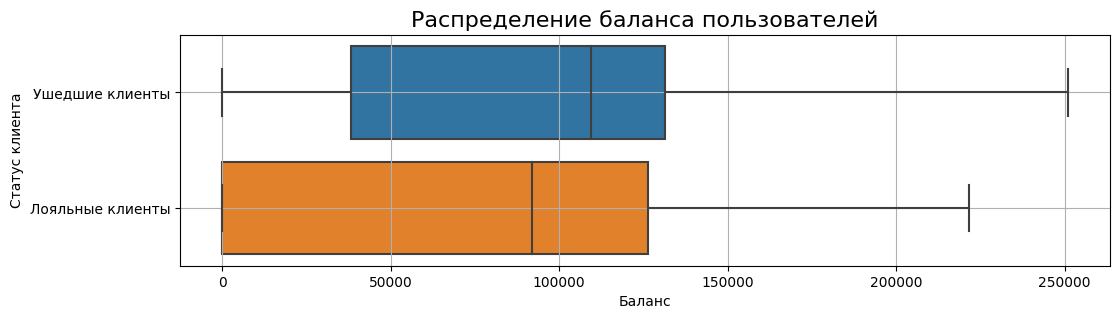

In [96]:
balance_churn = churn_data.loc[:,['Balance','Exited']].copy()
balance_churn['Exited'] = balance_churn['Exited'].apply(lambda x: 'Ушедшие клиенты' if x == 1 else 'Лояльные клиенты'  )
#balance_churn['Exited'] = balance_churn['Exited'].astype('string')
fig = plt.figure(figsize=(12, 3))
boxplot = sns.boxplot(data=balance_churn, x='Balance', y='Exited')
boxplot.set_title('Распределение баланса пользователей', fontsize=16)
boxplot.set_xlabel('Баланс')
boxplot.set_ylabel('Статус клиента')
boxplot.grid()

#### Лояльные клиенты имеют баланс в среднем (в медианном смысле) ниже ушедших клиентов. Левая граница межквартильного размаха баланса лояльных клиентов совпадает с нулем. Клиенты с низким балансом предпочитают не переходить в другие банки

# Задание 9.4

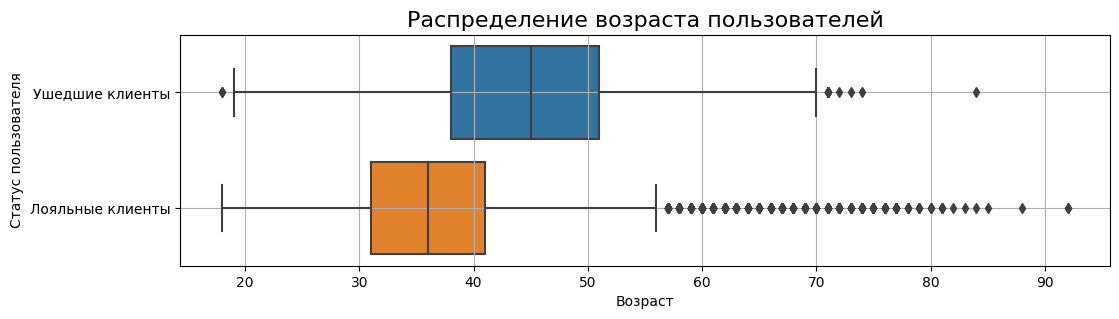

In [97]:
age_churn = churn_data.loc[:,['Age','Exited']].copy()
age_churn['Exited'] = age_churn['Exited'].apply(lambda x: 'Ушедшие клиенты' if x == 1 else 'Лояльные клиенты'  )

fig = plt.figure(figsize=(12, 3))
boxplot = sns.boxplot(data=age_churn, x='Age', y='Exited')
boxplot.set_title('Распределение возраста пользователей', fontsize=16)
boxplot.set_xlabel('Возраст')
boxplot.set_ylabel('Статус пользователя')
boxplot.grid()

#### Потенциальных выбросов больше в группе лояльных клиентов. Обратить внимание требуется на группу клиентов возраста 37-51 года, т.к. это основной возраст ушедших клиентов

# Задание 9.5

Text(24.000000000000014, 0.5, 'Кредитный рейтинг')

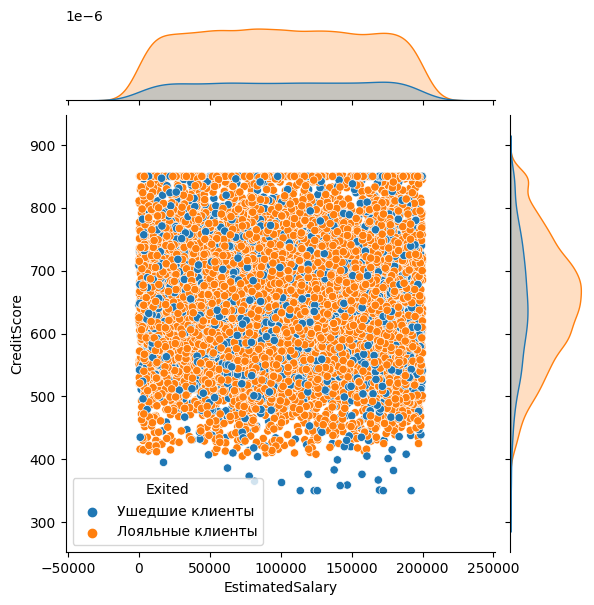

In [99]:
CrEstEx = churn_data.loc[:,['CreditScore','EstimatedSalary','Exited']].copy()
CrEstEx['Exited'] = CrEstEx['Exited'].apply(lambda x: 'Ушедшие клиенты' if x == 1 else 'Лояльные клиенты')

jointplot = sns.jointplot(
    data=CrEstEx, 
    x='EstimatedSalary', 
    y='CreditScore',
    hue= 'Exited')
boxplot.set_title('Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты', fontsize=16)
boxplot.set_xlabel('Предполагаемая зарплата')
boxplot.set_ylabel('Кредитный рейтинг')

#### Взаимосвязь кредитного рейтинга и предполагаемой зарплаты не просматривается. Клиенты с кредитным рейтингом ниже 400 уходят из банка

# Задание 9.6

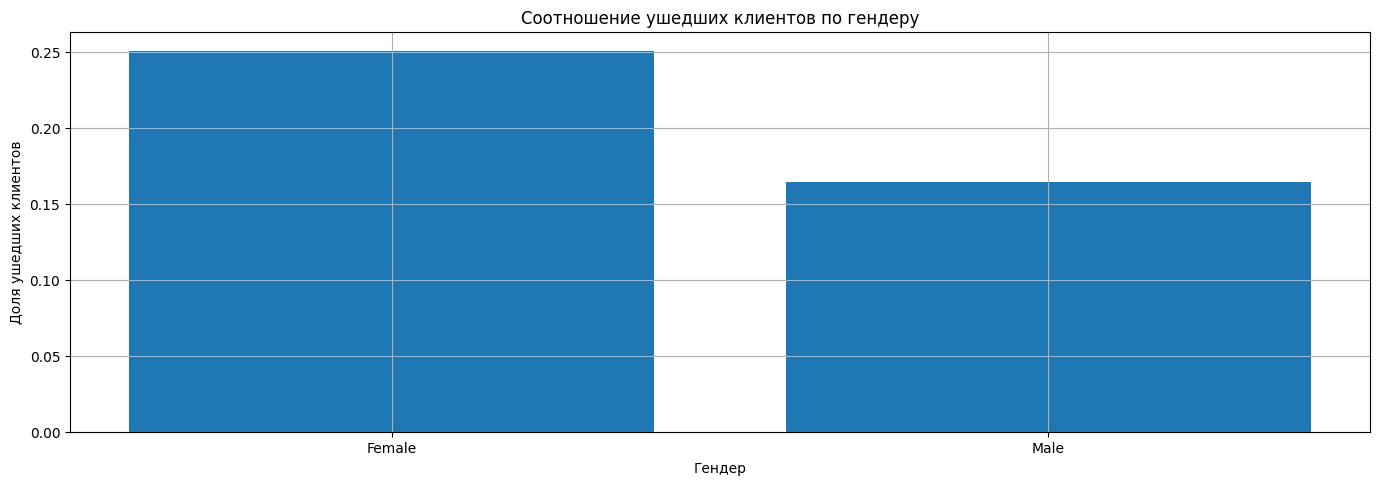

In [90]:
exited_gender = churn_data.groupby('Gender')['Exited'].mean()

fig = plt.figure(figsize=(13,4))
axes = fig.add_axes([0,0,1,1])
axes.bar(
    x = exited_gender.index,
    height = exited_gender
)
axes.set_title('Соотношение ушедших клиентов по гендеру')
axes.set_xlabel("Гендер")
axes.set_ylabel('Доля ушедших клиентов')
axes.grid()

#### Чаще уходят женщины

# Задание 9.7

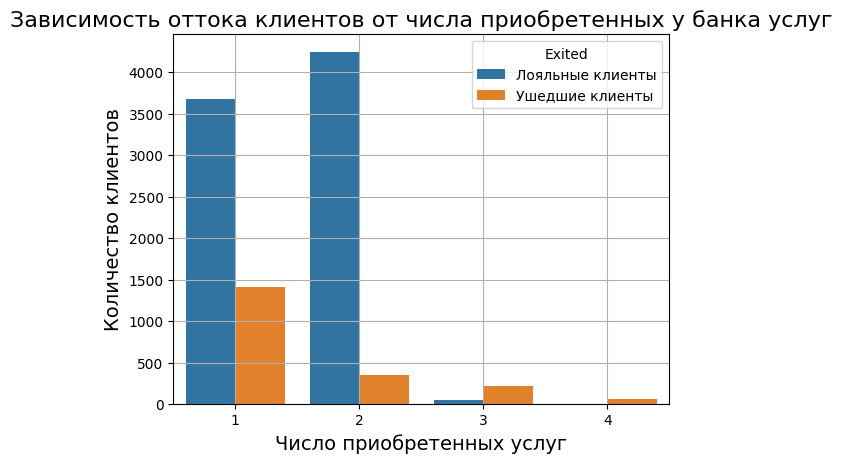

In [91]:
exited_produkts = churn_data.groupby(['NumOfProducts','Exited'], as_index=False)['CustomerId'].count()
exited_produkts['Exited'] = exited_produkts['Exited'].apply(lambda x: 'Ушедшие клиенты' if x == 1 else 'Лояльные клиенты')

barplot = sns.barplot(
    data=exited_produkts,
    x='NumOfProducts',
    y = 'CustomerId',
    hue= 'Exited',
    orient='v',
    #dodge=False
)
barplot.tick_params(axis='x', rotation=0);
barplot.set_title('Зависимость оттока клиентов от числа приобретенных у банка услуг', fontsize=16);
barplot.set_xlabel('Число приобретенных услуг', fontsize=14);
barplot.set_ylabel('Количество клиентов', fontsize=14);
barplot.grid()

#### Оптимальное число продуктов - 2

# Задание 9.8

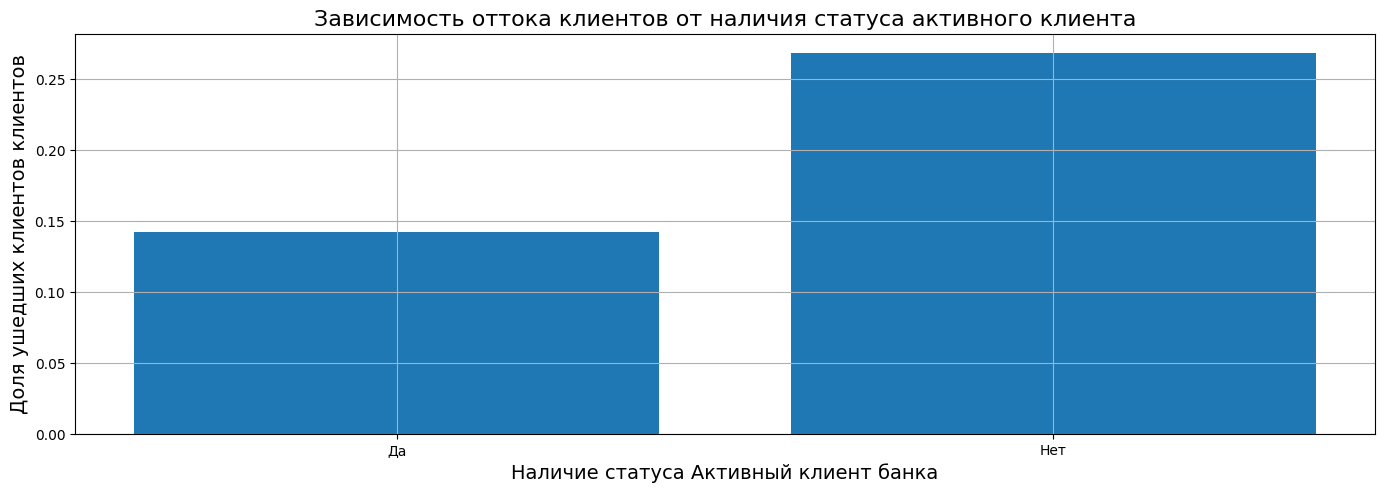

In [123]:
exited_active = churn_data.copy()
exited_active['IsActiveMember'] = exited_active['IsActiveMember'].apply(lambda x: 'Да' if x == 1 else 'Нет')
exited_active = exited_active.groupby(['IsActiveMember'])['Exited'].mean()

fig = plt.figure(figsize=(13,4))
axes = fig.add_axes([0,0,1,1])
axes.bar(
    x = exited_active.index,
    height = exited_active
)
axes.set_title('Зависимость оттока клиентов от наличия статуса активного клиента', fontsize=16);
axes.set_xlabel('Наличие статуса Активный клиент банка', fontsize=14);
axes.set_ylabel('Доля ушедших клиентов клиентов', fontsize=14);
axes.grid()


#### Доля ушедших клиентов со статусом Активный клиент значительно ниже доли ушедших неактивных клиентов. Для повышения активности среди клиентов необходимо: 
- реклама продуктов банка; 
- информирование о разработках в области безопасности он-лайн сервисов и личных данных клиента;
- обучение клинтов работе в он-лайн;
- опрос клиентов о сервисах банка, анализ и разработка стратегии для оптимизации 
- изучение опыта лидеров и др.

# Задание 9.9

In [131]:
exit_geo = churn_data.groupby('Geography', as_index=False)['Exited'].mean()

fig = px.choropleth(data_frame = exit_geo,
                    locations = 'Geography',
                    locationmode = 'country names',
                    color = 'Exited',
                    range_color = [0, 1],
                    title = 'Отток клиентов по странам',
                    width = 800,
                    height = 500,
                    color_continuous_scale = 'turbo'
)
fig.show()



#### В Германии доля ушедших клиентов выше чем во Франции и Испании. Может быть связанно с изменением законодательства или кредитной ставки в странах.

# Задание 9.10

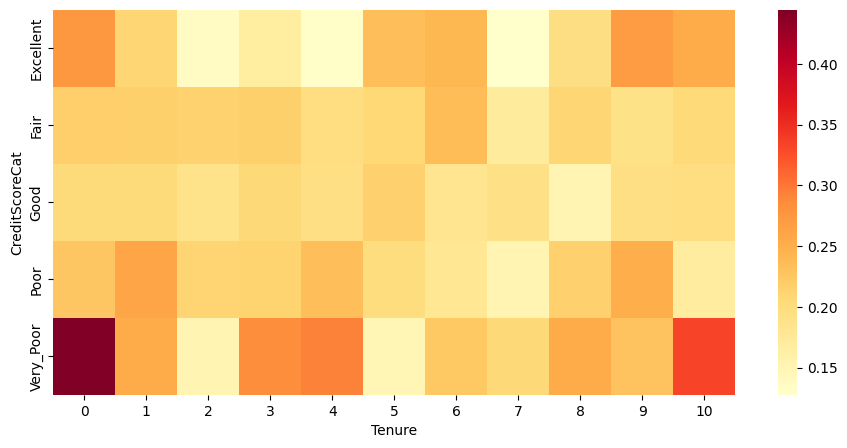

In [158]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

ch_data = churn_data.copy()
ch_data['CreditScoreCat'] = ch_data['CreditScore'].apply(get_credit_score_cat)

pivot = ch_data.pivot_table(
    values = 'Exited',
    index = 'CreditScoreCat',
    columns = 'Tenure',
    aggfunc = 'mean',
    fill_value = 0
)
pivot.columns = pivot.columns.astype('string')

fig = plt.figure(figsize=(11,5))
heatmap = sns.heatmap(
    data = pivot,
    cmap = 'YlOrRd'
)

#### Наиболее часто уходят из банка клиенты с Категорией кредитного рейтинга Very Poor и являющиеся клиентами 1 год или 10 лет